# Exercício 01 - Perceptron

###### Aluno: Rodolfo Augusto da Silva Arruda - NUSP: 6381848 - rarruda@usp.br (Aluno Especial Doutorado)

### Importação de módulos

In [ ]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
%matplotlib inline

### Montagem do conjunto de dados

In [509]:
# Rótulos
Y  = {"A1" : 1,"A2" : 1,"A3" : 1, "A4": 1,"A5" : 1,"A6" : 1}
YI = {"AI1":-1,"AI2":-1,"AI3":-1,"AI4":-1,"AI5":-1,"AI6":-1}

# Dados de entrada

## import exemplos A

types = {"A1": "/home/jovyan/NN/A/A1.csv", 
         "A2": "/home/jovyan/NN/A/A2.csv", 
         "A3": "/home/jovyan/NN/A/A3.csv",
         "A4": "/home/jovyan/NN/A/A4.csv",
         "A5": "/home/jovyan/NN/A/A5.csv",
         "A6": "/home/jovyan/NN/A/A6.csv"}
A = {}

for name, file in types.items():
    A[name]=np.genfromtxt(file,delimiter=',')
    #Transforma em array 1x25
    A[name]=np.reshape(A[name], (1,25))
    
## Separação dos dados entre treino e teste

A_treino = {}
A_teste = {}
Y_treino = {}
Y_teste = {}

amostra  = np.random.permutation(["A1", "A2", "A3", "A4", "A5","A6"])
treino_A = amostra[:4]
teste_A  = amostra[4:]

for elem in treino_A:
    A_treino[elem]=A[elem]
    Y_treino[elem]=Y[elem]
    
for elem in teste_A:
    A_teste[elem]=A[elem]
    Y_teste[elem]=Y[elem]
    

## import exemplos A invertido

types = {"AI1": "/home/jovyan/NN/A_INV/AI1.csv", 
         "AI2": "/home/jovyan/NN/A_INV/AI2.csv", 
         "AI3": "/home/jovyan/NN/A_INV/AI3.csv",
         "AI4": "/home/jovyan/NN/A_INV/AI4.csv",
         "AI5": "/home/jovyan/NN/A_INV/AI5.csv",
         "AI6": "/home/jovyan/NN/A_INV/AI6.csv"}
AI = {}

for name, file in types.items():
    AI[name]=np.genfromtxt(file,delimiter=',')
    #Transforma em array 1x25
    AI[name]=np.reshape(AI[name], (1,25))
    
### Separação dos dados entre treino e teste
  
AI_treino = {}
AI_teste = {}
YI_treino = {}
YI_teste = {}

amostra = np.random.permutation(["AI1", "AI2", "AI3", "AI4", "AI5","AI6"])
treino_AI = amostra[:4]
teste_AI  = amostra[4:]

for elem in treino_AI:
    AI_treino[elem]=AI[elem]
    YI_treino[elem]=YI[elem]
    
for elem in teste_AI:
    AI_teste[elem]=AI[elem]
    YI_teste[elem]=YI[elem]
    
    
# Dados finais para treino e teste

### Conjunto de dados treino
treino_final = {}
X = []

for d in [A_treino,AI_treino]:
    treino_final.update(d)

for elem in treino_final.keys():
    X = np.append(X,treino_final[elem][0])
treino_final = np.reshape(X,(8,25))  

treino_rotulo = {}
for d in [Y_treino,YI_treino]:
    treino_rotulo.update(d)
    
treino_rotulo_final = []  
for elem in treino_rotulo.keys():
    treino_rotulo_final = np.append(treino_rotulo_final,treino_rotulo[elem])
    
### Conjunto de dados teste   
teste_final = {}
X = []

for d in [A_teste,AI_teste]:
    teste_final.update(d)    

for elem in teste_final.keys():
    X = np.append(X,teste_final[elem][0])
teste_final = np.reshape(X,(4,25))  
    
teste_rotulo = {}
for d in [Y_teste,YI_teste]:
    teste_rotulo.update(d) 

teste_rotulo_final = []  
for elem in teste_rotulo.keys():
    teste_rotulo_final = np.append(teste_rotulo_final,teste_rotulo[elem])  

In [565]:
treino_final

array([[-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [ 1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [-1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
         1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.],
       [ 1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
         1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.],
       [ 1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
         1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.],
      

In [566]:
treino_rotulo_final

array([ 1.,  1.,  1.,  1., -1., -1., -1., -1.])

In [567]:
teste_final

array([[-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.],
       [ 1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
         1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.],
       [ 1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
         1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.]])

In [568]:
teste_rotulo_final

array([ 1.,  1., -1., -1.])

### Inicialização dos pesos

In [512]:
W = np.append(np.zeros(treino_final[0].shape ),0)

In [513]:
W

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Implementação ADALINE

In [541]:
def fit(X, y,eta=0.01,n_iter=500):
    
    cost = []
    for i in range(n_iter):
        output = np.dot(X, W[1:]) + W[0]
        errors = (y - output)
        W[1:] += eta * X.T.dot(errors)
        W[0]  += eta * errors.sum()
        cost = np.append(cost,(errors**2).sum() / 2.0)
        
    return output, cost  

In [542]:
output, cost = fit(X=treino_final, y=treino_rotulo_final,eta=0.01,n_iter=50)

In [562]:
treino_rotulo_final

array([ 1.,  1.,  1.,  1., -1., -1., -1., -1.])

In [543]:
output

array([ 1.00928346,  0.99656062,  0.99710504,  0.99656062, -0.9997282 ,
       -0.9997282 , -1.00048649, -0.9997282 ])

In [532]:
def predict(X):
    predicao = np.where(np.dot(X, W[1:]) + W[0] >= 0.0, 1, -1)
    return predicao

In [533]:
predicao = predict(X=teste_final)

In [564]:
teste_rotulo_final

array([ 1.,  1., -1., -1.])

In [534]:
predicao

array([ 1,  1, -1, -1])

##### Visualização do erro em função das épocas de treinamento

(0, 0.00016)

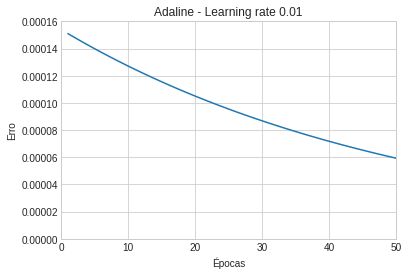

In [571]:
x= range(1, len(cost) + 1)
y= cost
plt.plot(x,y)
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.title('Adaline - Learning rate 0.01')
plt.xlim(0,len(x))
plt.ylim(0,0.00016)

### Referências

###### Bibliografia do curso
###### https://www.machinelearningplus.com/plots/matplotlib-line-plot/
###### https://www.bogotobogo.com/python/scikit-learn/Single-Layer-Neural-Network-Adaptive-Linear-Neuron.php
###### https://wizardforcel.gitbooks.io/deep-learning-keras-tensorflow/content/1.1.1%20Perceptron%20and%20Adaline.html